In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sqlite3

In [3]:
holidays = pd.read_csv('all_holiday_dates.csv')
# holidays

In [4]:
conn = sqlite3.connect('mock_DG.db')

In [6]:
# cursor = conn.cursor()

# cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# tables = cursor.fetchall()

# for table in tables:
#     print(table[0])

# cursor.close()
# conn.close()

In [5]:
pd.read_sql("""SELECT *
                        FROM 'orders';""", conn)

,id,createdAt,userId,quantity,refunded,currency,sales,providerId
0,4648711062057701806,2023-08-31 10:14:49,833181563296211638,2,0,eur,1000,3518867990385707647
1,1676056141507951956,2023-03-21 17:04:54,7763311846463275691,1,0,eur,400,6413422964860176913
2,7745602867536251060,2023-07-19 09:48:28,8919282109171104948,2,0,eur,680,123356649204044788
3,7319989469562109720,2023-08-10 12:29:01,5785370845306063462,1,0,eur,1099,7268869293921836511
4,8979946097528312402,2022-10-03 09:55:15,8918527236425591239,1,0,eur,200,7530970657789428790
...,...,...,...,...,...,...,...,...
299966,149803950760879444,2022-09-29 10:40:23,5244759954355981787,1,0,eur,600,3669159159567845583
299967,5087256441085251695,2023-07-22 10:31:59,3656697072752790037,1,0,eur,580,7388976155070169497
299968,9102804762466111812,2022-12-08 12:29:32,792109139296450394,1,0,eur,550,8221933215924621731
299969,1639560206671412519,2023-02-16 16:40:52,3105179374942688281,1,0,eur,590,3993606524249171648


In [6]:
pd.read_sql("""SELECT *
                        FROM 'providers';""", conn)

,id,defaultOfferType,country,registeredDate
0,6563612899329659014,meal,fin,2015-11-24 16:33:35
1,8724554181611615450,meal,fin,2016-01-27 00:08:50
2,946161542061641905,meal,fin,2016-02-01 15:03:27
3,7056903344430959871,meal,fin,2016-02-02 14:56:40
4,3497712091356119302,meal,fin,2016-02-03 13:20:29
...,...,...,...,...
4332,5898387063945077169,meal,fin,2023-11-10 08:22:56
4333,6566678889706300354,meal,fin,2023-11-10 11:24:56
4334,3706913415608167052,meal,fin,2023-11-10 17:56:14
4335,5995496277106943613,meal,fin,2023-11-13 16:01:10


In [7]:
pd.read_sql("""SELECT *
                        FROM 'users';""", conn)

,id,country,registeredDate
0,6244948894430711520,FI,2015-11-24 16:31:10
1,7333245412641704133,FI,2015-11-24 16:31:10
2,7387231492403274666,FI,2015-11-24 16:31:10
3,462254365688400616,FI,2015-11-24 16:31:10
4,1895545503734717224,FI,2015-11-24 16:31:10
...,...,...,...
358361,7196092156622441252,FI,2023-11-15 12:45:55
358362,6883201590444718954,SE,2023-11-15 13:05:59
358363,4955549817670357375,FI,2023-11-15 13:24:56
358364,453099225938434358,FI,2023-11-15 13:42:19


In [10]:
# Question 1-1

pd.read_sql("""SELECT u.id as user_id, u.registeredDate register_date, sum(o.sales) as total_purchases from users u
join orders o 
on u.id = o.userid
where substring(u.registeredDate,1,4) = '2023'
group by u.id, u.registeredDate
order by sum(o.sales) desc
limit 10
                       ;""", conn)

,user_id,register_date,total_purchases
0,1909500535585009223,2023-07-16 19:01:59,235600
1,5901695164271788775,2023-06-07 23:58:23,108100
2,6973060567244168253,2023-01-24 16:32:06,88400
3,3438929124849258001,2023-03-08 05:00:22,68400
4,9054819741532574380,2023-02-22 16:45:55,63400
5,7926211913499375293,2023-08-09 11:08:17,61600
6,7283920631663633681,2023-03-07 19:57:02,51800
7,6305182979770971028,2023-07-24 21:08:57,51200
8,3180016143776821569,2023-07-03 09:52:32,48600
9,1250268757419891649,2023-02-28 11:26:51,45500


In [11]:
# Question 1-2

pd.read_sql("""SELECT p.defaultOfferType as offer_type, count(o.id) as n_of_orderd from providers p
join orders o
on p.id = o.providerid
group by p.defaultOfferType
order by count(o.id) desc
                       ;""", conn)

,offer_type,n_of_orderd
0,meal,219764
1,snack,49861
2,grocery-bag,27192
3,dessert,1910
4,ingredients,1091
5,flowers,153


In [8]:
orders = pd.read_sql("""SELECT * FROM 'orders';""", conn)
users = pd.read_sql("""SELECT * FROM 'users';""", conn)
providers = pd.read_sql("""SELECT * FROM 'providers';""", conn)

In [9]:
orders['createdAt'].nunique()

297220

In [13]:
orders

,id,createdAt,userId,quantity,refunded,currency,sales,providerId
0,4648711062057701806,2023-08-31 10:14:49,833181563296211638,2,0,eur,1000,3518867990385707647
1,1676056141507951956,2023-03-21 17:04:54,7763311846463275691,1,0,eur,400,6413422964860176913
2,7745602867536251060,2023-07-19 09:48:28,8919282109171104948,2,0,eur,680,123356649204044788
3,7319989469562109720,2023-08-10 12:29:01,5785370845306063462,1,0,eur,1099,7268869293921836511
4,8979946097528312402,2022-10-03 09:55:15,8918527236425591239,1,0,eur,200,7530970657789428790
...,...,...,...,...,...,...,...,...
299966,149803950760879444,2022-09-29 10:40:23,5244759954355981787,1,0,eur,600,3669159159567845583
299967,5087256441085251695,2023-07-22 10:31:59,3656697072752790037,1,0,eur,580,7388976155070169497
299968,9102804762466111812,2022-12-08 12:29:32,792109139296450394,1,0,eur,550,8221933215924621731
299969,1639560206671412519,2023-02-16 16:40:52,3105179374942688281,1,0,eur,590,3993606524249171648


In [14]:
users

,id,country,registeredDate
0,6244948894430711520,FI,2015-11-24 16:31:10
1,7333245412641704133,FI,2015-11-24 16:31:10
2,7387231492403274666,FI,2015-11-24 16:31:10
3,462254365688400616,FI,2015-11-24 16:31:10
4,1895545503734717224,FI,2015-11-24 16:31:10
...,...,...,...
358361,7196092156622441252,FI,2023-11-15 12:45:55
358362,6883201590444718954,SE,2023-11-15 13:05:59
358363,4955549817670357375,FI,2023-11-15 13:24:56
358364,453099225938434358,FI,2023-11-15 13:42:19


In [15]:
providers

,id,defaultOfferType,country,registeredDate
0,6563612899329659014,meal,fin,2015-11-24 16:33:35
1,8724554181611615450,meal,fin,2016-01-27 00:08:50
2,946161542061641905,meal,fin,2016-02-01 15:03:27
3,7056903344430959871,meal,fin,2016-02-02 14:56:40
4,3497712091356119302,meal,fin,2016-02-03 13:20:29
...,...,...,...,...
4332,5898387063945077169,meal,fin,2023-11-10 08:22:56
4333,6566678889706300354,meal,fin,2023-11-10 11:24:56
4334,3706913415608167052,meal,fin,2023-11-10 17:56:14
4335,5995496277106943613,meal,fin,2023-11-13 16:01:10


In [16]:
holidays['holyDate'].dtype

dtype('O')

In [32]:
holidays['holyDate'] = pd.to_datetime(holidays['holyDate'])
holidays['holyDate'].dtype

dtype('<M8[ns]')

In [11]:
orders['createdAt'] = pd.to_datetime(orders['createdAt']).dt.date
orders['createdAt'] = pd.to_datetime(orders['createdAt'])
orders

,id,createdAt,userId,quantity,refunded,currency,sales,providerId
0,4648711062057701806,2023-08-31,833181563296211638,2,0,eur,1000,3518867990385707647
1,1676056141507951956,2023-03-21,7763311846463275691,1,0,eur,400,6413422964860176913
2,7745602867536251060,2023-07-19,8919282109171104948,2,0,eur,680,123356649204044788
3,7319989469562109720,2023-08-10,5785370845306063462,1,0,eur,1099,7268869293921836511
4,8979946097528312402,2022-10-03,8918527236425591239,1,0,eur,200,7530970657789428790
...,...,...,...,...,...,...,...,...
299966,149803950760879444,2022-09-29,5244759954355981787,1,0,eur,600,3669159159567845583
299967,5087256441085251695,2023-07-22,3656697072752790037,1,0,eur,580,7388976155070169497
299968,9102804762466111812,2022-12-08,792109139296450394,1,0,eur,550,8221933215924621731
299969,1639560206671412519,2023-02-16,3105179374942688281,1,0,eur,590,3993606524249171648


In [12]:
orders['createdAt'].dtype

dtype('<M8[ns]')

In [15]:
# question 2-1

df_merge = pd.merge(holidays, orders, left_on = 'holyDate' , right_on = 'createdAt' , how = 'inner')
df_merge

,holyDate,id,createdAt,userId,quantity,refunded,currency,sales,providerId
0,2023-01-01,6824590042295427962,2023-01-01,7611282337631849609,1,0,eur,580,4848961324656110415
1,2023-01-01,1154584410961160102,2023-01-01,4852187236518241206,1,0,eur,550,5428088439849503627
2,2023-01-01,7922911723050972446,2023-01-01,683674425838744293,2,0,eur,550,3622516011019541213
3,2023-01-01,7504828095388299562,2023-01-01,2769940939459844445,1,0,eur,520,3734111210940214253
4,2023-01-01,6142204371230696160,2023-01-01,7597228237222114093,1,0,eur,290,595020901018718286
...,...,...,...,...,...,...,...,...,...
4971,2022-12-26,1912494123843954538,2022-12-26,7166094850925652597,1,0,sek,4900,7198110370745783236
4972,2022-12-26,9150939555276737179,2022-12-26,5222239016419788491,1,0,eur,1200,5673551166196030529
4973,2022-12-26,5630883080272792685,2022-12-26,1458001497850298541,1,0,eur,345,7381653136870266908
4974,2022-12-26,8494906540321468506,2022-12-26,5304534715701767030,1,0,eur,150,6413422964860176913


In [16]:
normal_dates_df = orders.merge(holidays, left_on = 'createdAt' , right_on = 'holyDate', how='left', indicator=True)
normal_dates_df = normal_dates_df[normal_dates_df['_merge'] == 'left_only'].drop('_merge', axis=1)
normal_dates_df

,id,createdAt,userId,quantity,refunded,currency,sales,providerId,holyDate
0,4648711062057701806,2023-08-31,833181563296211638,2,0,eur,1000,3518867990385707647,NaT
1,1676056141507951956,2023-03-21,7763311846463275691,1,0,eur,400,6413422964860176913,NaT
2,7745602867536251060,2023-07-19,8919282109171104948,2,0,eur,680,123356649204044788,NaT
3,7319989469562109720,2023-08-10,5785370845306063462,1,0,eur,1099,7268869293921836511,NaT
4,8979946097528312402,2022-10-03,8918527236425591239,1,0,eur,200,7530970657789428790,NaT
...,...,...,...,...,...,...,...,...,...
299966,149803950760879444,2022-09-29,5244759954355981787,1,0,eur,600,3669159159567845583,NaT
299967,5087256441085251695,2023-07-22,3656697072752790037,1,0,eur,580,7388976155070169497,NaT
299968,9102804762466111812,2022-12-08,792109139296450394,1,0,eur,550,8221933215924621731,NaT
299969,1639560206671412519,2023-02-16,3105179374942688281,1,0,eur,590,3993606524249171648,NaT


In [17]:
normal_dates_df['createdAt'].nunique()

403

In [18]:
df_merge['createdAt'].nunique()

16

In [43]:
df_merge['currency'].value_counts()

eur    4921
sek      55
Name: currency, dtype: int64

In [20]:
df_merge['sales'] = df_merge['sales'].astype(int)
normal_dates_df['sales'] = normal_dates_df['sales'].astype(int)

In [44]:
df_merge['sales_euro'] = 0

euro_condition = df_merge['currency'] == 'eur'
sek_condition = df_merge['currency'] == 'sek'

df_merge.loc[euro_condition, 'sales_euro'] = df_merge.loc[euro_condition, 'sales']
df_merge.loc[sek_condition, 'sales_euro'] = 0.088 * df_merge.loc[sek_condition, 'sales']

df_merge

,holyDate,id,createdAt,userId,quantity,refunded,currency,sales,providerId,sales_euro
0,2023-01-01,6824590042295427962,2023-01-01,7611282337631849609,1,0,eur,580,4848961324656110415,580.0
1,2023-01-01,1154584410961160102,2023-01-01,4852187236518241206,1,0,eur,550,5428088439849503627,550.0
2,2023-01-01,7922911723050972446,2023-01-01,683674425838744293,2,0,eur,550,3622516011019541213,550.0
3,2023-01-01,7504828095388299562,2023-01-01,2769940939459844445,1,0,eur,520,3734111210940214253,520.0
4,2023-01-01,6142204371230696160,2023-01-01,7597228237222114093,1,0,eur,290,595020901018718286,290.0
...,...,...,...,...,...,...,...,...,...,...
4971,2022-12-26,1912494123843954538,2022-12-26,7166094850925652597,1,0,sek,4900,7198110370745783236,431.2
4972,2022-12-26,9150939555276737179,2022-12-26,5222239016419788491,1,0,eur,1200,5673551166196030529,1200.0
4973,2022-12-26,5630883080272792685,2022-12-26,1458001497850298541,1,0,eur,345,7381653136870266908,345.0
4974,2022-12-26,8494906540321468506,2022-12-26,5304534715701767030,1,0,eur,150,6413422964860176913,150.0


In [45]:
normal_dates_df['sales_euro'] = 0

euro_condition = normal_dates_df['currency'] == 'eur'
sek_condition = normal_dates_df['currency'] == 'sek'

normal_dates_df.loc[euro_condition, 'sales_euro'] = normal_dates_df.loc[euro_condition, 'sales']
normal_dates_df.loc[sek_condition, 'sales_euro'] = 0.088 * normal_dates_df.loc[sek_condition, 'sales']

normal_dates_df

,id,createdAt,userId,quantity,refunded,currency,sales,providerId,holyDate,sales_euro
0,4648711062057701806,2023-08-31,833181563296211638,2,0,eur,1000,3518867990385707647,NaT,1000.0
1,1676056141507951956,2023-03-21,7763311846463275691,1,0,eur,400,6413422964860176913,NaT,400.0
2,7745602867536251060,2023-07-19,8919282109171104948,2,0,eur,680,123356649204044788,NaT,680.0
3,7319989469562109720,2023-08-10,5785370845306063462,1,0,eur,1099,7268869293921836511,NaT,1099.0
4,8979946097528312402,2022-10-03,8918527236425591239,1,0,eur,200,7530970657789428790,NaT,200.0
...,...,...,...,...,...,...,...,...,...,...
299966,149803950760879444,2022-09-29,5244759954355981787,1,0,eur,600,3669159159567845583,NaT,600.0
299967,5087256441085251695,2023-07-22,3656697072752790037,1,0,eur,580,7388976155070169497,NaT,580.0
299968,9102804762466111812,2022-12-08,792109139296450394,1,0,eur,550,8221933215924621731,NaT,550.0
299969,1639560206671412519,2023-02-16,3105179374942688281,1,0,eur,590,3993606524249171648,NaT,590.0


In [47]:
df_merge['sales_euro'].mean()

651.006069131833

In [48]:
normal_dates_df['sales_euro'].mean()

628.1300388142172

In [49]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(df_merge['sales_euro'], normal_dates_df['sales_euro'])

# Output the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 3.4371076377224847
p-value: 0.0005880415819680137


In [ ]:
# question 2-2

In [24]:
df_merge['providerId'].nunique()

1206

In [25]:
normal_dates_df['providerId'].nunique()

3561

In [29]:
# df_merge

In [30]:
normal_dates_df

,id,createdAt,userId,quantity,refunded,currency,sales,providerId,holyDate
0,4648711062057701806,2023-08-31,833181563296211638,2,0,eur,1000,3518867990385707647,NaT
1,1676056141507951956,2023-03-21,7763311846463275691,1,0,eur,400,6413422964860176913,NaT
2,7745602867536251060,2023-07-19,8919282109171104948,2,0,eur,680,123356649204044788,NaT
3,7319989469562109720,2023-08-10,5785370845306063462,1,0,eur,1099,7268869293921836511,NaT
4,8979946097528312402,2022-10-03,8918527236425591239,1,0,eur,200,7530970657789428790,NaT
...,...,...,...,...,...,...,...,...,...
299966,149803950760879444,2022-09-29,5244759954355981787,1,0,eur,600,3669159159567845583,NaT
299967,5087256441085251695,2023-07-22,3656697072752790037,1,0,eur,580,7388976155070169497,NaT
299968,9102804762466111812,2022-12-08,792109139296450394,1,0,eur,550,8221933215924621731,NaT
299969,1639560206671412519,2023-02-16,3105179374942688281,1,0,eur,590,3993606524249171648,NaT


In [1]:
# question 2-3

In [51]:
users['registeredDate'] = pd.to_datetime(users['registeredDate']).dt.date
users

,id,country,registeredDate
0,6244948894430711520,FI,2015-11-24
1,7333245412641704133,FI,2015-11-24
2,7387231492403274666,FI,2015-11-24
3,462254365688400616,FI,2015-11-24
4,1895545503734717224,FI,2015-11-24
...,...,...,...
358361,7196092156622441252,FI,2023-11-15
358362,6883201590444718954,SE,2023-11-15
358363,4955549817670357375,FI,2023-11-15
358364,453099225938434358,FI,2023-11-15


In [50]:
holidays['holyDate'] = pd.to_datetime(holidays['holyDate']).dt.date
holidays

,holyDate
0,2023-01-01
1,2023-01-06
2,2023-04-07
3,2023-04-09
4,2023-04-10
5,2023-05-01
6,2023-05-18
7,2023-05-28
8,2023-06-23
9,2023-06-24


In [39]:
df_merge1 = pd.merge(holidays, users, left_on = 'holyDate', right_on = 'registeredDate', how = 'inner')
df_merge1

,holyDate,id,country,registeredDate
0,2023-01-01,2780856564214170547,FI,2023-01-01
1,2023-01-01,916143039075849289,FI,2023-01-01
2,2023-01-01,800100477229229899,FI,2023-01-01
3,2023-01-01,7771711811924013007,FI,2023-01-01
4,2023-01-01,8169570410391569263,FI,2023-01-01
...,...,...,...,...
3523,2022-12-26,8397463432487448681,FI,2022-12-26
3524,2022-12-26,1527916126187637514,FI,2022-12-26
3525,2022-12-26,3233912632669890115,FI,2022-12-26
3526,2022-12-26,4085106160810829235,FI,2022-12-26


In [42]:
normal_dates_df1 = users.merge(holidays, left_on = 'registeredDate' , right_on = 'holyDate', how='left', indicator=True)
normal_dates_df1 = normal_dates_df1[normal_dates_df1['_merge'] == 'left_only'].drop('_merge', axis=1)
normal_dates_df1

,id,country,registeredDate,holyDate
0,6244948894430711520,FI,2015-11-24,NaN
1,7333245412641704133,FI,2015-11-24,NaN
2,7387231492403274666,FI,2015-11-24,NaN
3,462254365688400616,FI,2015-11-24,NaN
4,1895545503734717224,FI,2015-11-24,NaN
...,...,...,...,...
358361,7196092156622441252,FI,2023-11-15,NaN
358362,6883201590444718954,SE,2023-11-15,NaN
358363,4955549817670357375,FI,2023-11-15,NaN
358364,453099225938434358,FI,2023-11-15,NaN


In [60]:
users['registeredDate'] = pd.to_datetime(users['registeredDate']).dt.date

In [61]:
holidays['holyDate'] = pd.to_datetime(holidays['holyDate']).dt.date

In [64]:
import datetime

In [65]:
start_date = datetime.date(2022, 1, 1)
end_date = datetime.date(2023, 12, 30)

users_AB = users[(users['registeredDate'] > start_date) & (users['registeredDate'] < end_date)]
users_AB

,id,country,registeredDate
202206,7326560772028050839,FI,2022-01-02
202207,972861375333121537,FI,2022-01-02
202208,3742116912208698679,FI,2022-01-02
202209,2268706233349008511,FI,2022-01-02
202210,4137890029964246716,FI,2022-01-02
...,...,...,...
358361,7196092156622441252,FI,2023-11-15
358362,6883201590444718954,SE,2023-11-15
358363,4955549817670357375,FI,2023-11-15
358364,453099225938434358,FI,2023-11-15


In [66]:
users_holiday = pd.merge(users_AB, holidays, left_on = 'registeredDate', right_on = 'holyDate' , how = 'inner')
users_holiday

,id,country,registeredDate,holyDate
0,8969272405086267493,FI,2022-01-06,2022-01-06
1,5908662332325517833,FI,2022-01-06,2022-01-06
2,8978710667014978023,FI,2022-01-06,2022-01-06
3,8969950862500112400,FI,2022-01-06,2022-01-06
4,3786438700934225678,FI,2022-01-06,2022-01-06
...,...,...,...,...
3397,6830140634940650043,FI,2023-11-04,2023-11-04
3398,8092210229442547063,SE,2023-11-04,2023-11-04
3399,838052659543582539,FI,2023-11-04,2023-11-04
3400,4482490324067657458,FI,2023-11-04,2023-11-04


In [67]:
users_normal = users_AB.merge(holidays, left_on = 'registeredDate' , right_on = 'holyDate', how='left', indicator=True)
users_normal = users_normal[users_normal['_merge'] == 'left_only'].drop('_merge', axis=1)
users_normal

,id,country,registeredDate,holyDate
0,7326560772028050839,FI,2022-01-02,NaN
1,972861375333121537,FI,2022-01-02,NaN
2,3742116912208698679,FI,2022-01-02,NaN
3,2268706233349008511,FI,2022-01-02,NaN
4,4137890029964246716,FI,2022-01-02,NaN
...,...,...,...,...
156155,7196092156622441252,FI,2023-11-15,NaN
156156,6883201590444718954,SE,2023-11-15,NaN
156157,4955549817670357375,FI,2023-11-15,NaN
156158,453099225938434358,FI,2023-11-15,NaN


In [72]:
users_holiday['country'].value_counts()

FI    3132
EE     139
SE      79
DE      11
FR       7
PL       6
CZ       4
GB       4
AT       3
NO       2
IT       2
NL       2
ES       2
DK       2
AX       2
LV       1
UA       1
SR       1
GR       1
EG       1
Name: country, dtype: int64

In [73]:
users_normal['country'].value_counts()

FI    141061
EE      5919
SE      3818
DE       355
ES       157
       ...  
PA         1
KE         1
CW         1
GS         1
SG         1
Name: country, Length: 92, dtype: int64

In [69]:
users_holiday['registeredDate'].nunique()

25

In [71]:
users_normal['registeredDate'].nunique()

658

In [54]:
users_normal['registeredDate'].min()

Timestamp('2022-01-02 00:00:00')

In [53]:
users_normal['registeredDate'].max()

Timestamp('2023-11-15 00:00:00')

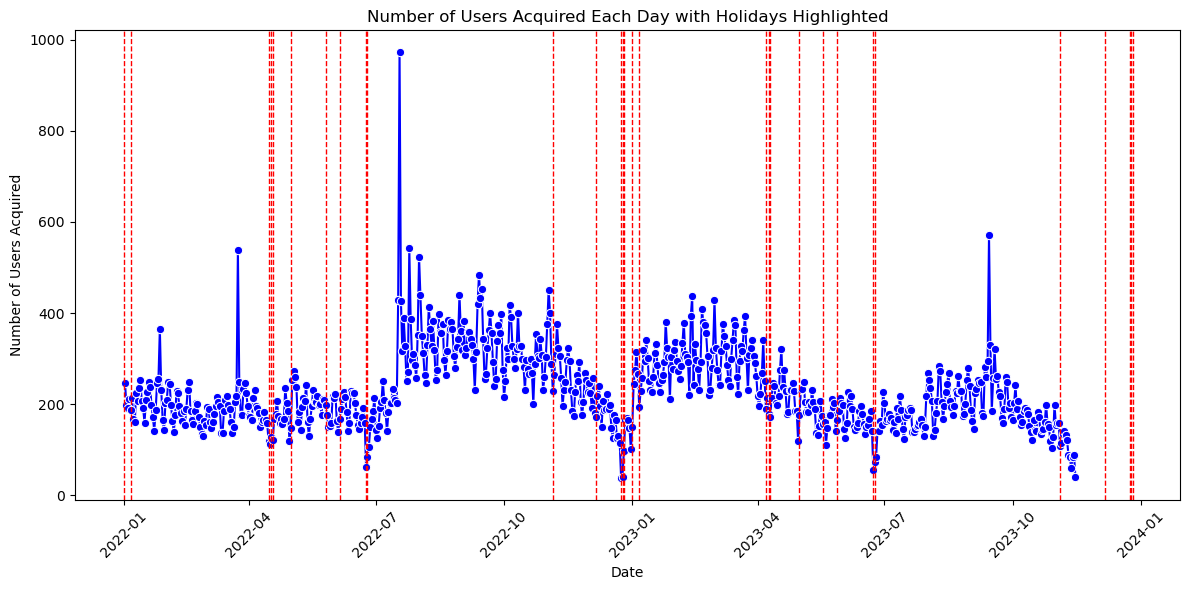

In [56]:
user_counts_per_day = users_AB.groupby(users_AB['registeredDate'].dt.date).size()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=user_counts_per_day.index, y=user_counts_per_day.values, marker='o', color='b')

# Mark or highlight holidays
for holiday in holidays['holyDate']:
    plt.axvline(x=holiday, color='r', linestyle='--', linewidth=1)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Users Acquired')
plt.title('Number of Users Acquired Each Day with Holidays Highlighted')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [59]:
orders = pd.read_sql("""SELECT * FROM 'orders';""", conn)
users = pd.read_sql("""SELECT * FROM 'users';""", conn)
providers = pd.read_sql("""SELECT * FROM 'providers';""", conn)

In [60]:
orders.to_csv('orders.csv')
users.to_csv('users.csv')
providers.to_csv('providers.csv')